# This notebook contains an analysis of the Deep Convolutional Neural Network trained on the Minerals dataset.

In [11]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import torch
from torch.autograd import Variable
from torch.nn.parameter import Parameter
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.nn.init as init
from torch import tanh
from torch.nn import Linear, Conv2d, BatchNorm2d, MaxPool2d, Dropout2d, BatchNorm1d, Conv1d, MaxPool1d
from torch.nn.functional import relu, elu, relu6, sigmoid, softmax, leaky_relu

In [12]:
# Visualising some of the failed cases to get an understanding of the network performance
# Loading the variable names
Reduced_MineralNames = np.load('ImportantVariables/Reduced_RRUFFMineralNames.npy', allow_pickle=True)
Reduced_MineralDict = np.load('ImportantVariables/Reduced_RRUFFMineralDict.npy', allow_pickle=True)
Reduced_MineralSpectra = np.load('ImportantVariables/Reduced_RRUFFSpectra.npy', allow_pickle=True)

training_data = np.load('ImportantVariables/X_train_final_normalised.npy', allow_pickle=True)
training_targets = np.load('ImportantVariables/y_train_final_normalised.npy', allow_pickle=True)
training_predictions = np.load('ImportantVariables/Training_Predictions.npy', allow_pickle=True)

test_data = np.load('ImportantVariables/X_test_validation_normalised.npy', allow_pickle=True)
test_targets = np.load('ImportantVariables/Validation_targs.npy', allow_pickle=True)
test_predictions = np.load('ImportantVariables/Validation_Predictions.npy', allow_pickle=True)

training_loss = np.load('ImportantVariables/Training_Loss.npy', allow_pickle=True)
validation_loss = np.load('ImportantVariables/Validation_Loss.npy', allow_pickle=True)

In [13]:
model = torch.load('DEEP_CNN_TRAINEDMODEL/Final_Model.pth')

In [14]:
X_train = np.load('ImportantVariables/Original_X_train.npy', allow_pickle=True)
Y_train = np.load('ImportantVariables/Original_Y_train.npy', allow_pickle=True)
X_test = np.load('ImportantVariables/Original_X_test.npy', allow_pickle=True)
Y_test = np.load('ImportantVariables/Original_Y_test.npy', allow_pickle=True)

In [15]:
Validation_Acc = np.load('ImportantVariables/Validation_Accuracy.npy', allow_pickle=True)

In [18]:
Validation_Acc

array([0.08116386, 0.20673813, 0.25574273, 0.28177642, 0.30627871,
       0.32924962, 0.35375191, 0.36600306, 0.381317  , 0.39203675,
       0.40122511, 0.4042879 , 0.40888208, 0.41500766, 0.42113323,
       0.42266462, 0.43644717, 0.43644717, 0.44104135, 0.43950995,
       0.43797856, 0.44257274, 0.44104135, 0.44869832, 0.44716692,
       0.4517611 , 0.4517611 , 0.45635528, 0.4517611 , 0.45482389,
       0.45482389, 0.46094946, 0.46094946, 0.45941807, 0.45788668,
       0.46401225, 0.46094946, 0.46554364, 0.46248086, 0.46554364,
       0.46707504, 0.46707504, 0.47013783, 0.46860643, 0.47013783,
       0.47013783, 0.47473201, 0.47473201, 0.47779479, 0.47473201])

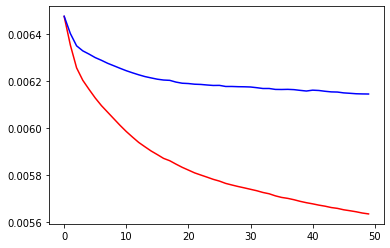

In [5]:
plt.plot(range(50), training_loss, 'r', range(50), validation_loss, 'b')

In [6]:
for i in range(0):
    print (i)

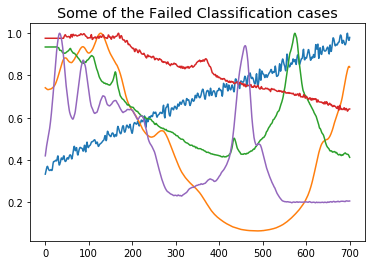

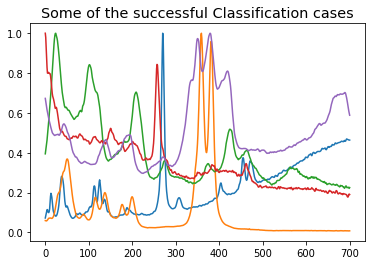

In [24]:
failed_indices = np.where(test_targets!=test_predictions)[0]
plt.title('Some of the Failed Classification cases', fontsize='x-large')
for i in range(5):
    plt.plot(test_data[failed_indices[i]])
plt.savefig('Images/Failed_Cases.png')
plt.show()


success_indices = np.where(test_targets==test_predictions)[0]
plt.title('Some of the successful Classification cases', fontsize='x-large')
for i in range(5):
    plt.plot(test_data[success_indices[i]])
plt.savefig('Images/Successful_Cases.png')
plt.show()





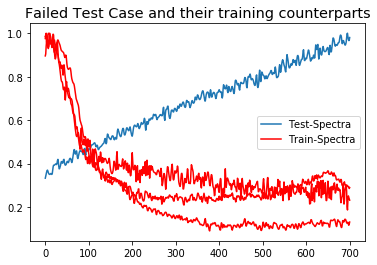

In [42]:
plt.title('Failed Test Case and their training counterparts', fontsize='x-large')
plt.plot(X_test[failed_indices[0]]/max(X_test[failed_indices[0]]))
Spectra_failed_Cases_train=X_train[np.where(Y_train==0)[0]]
for i in range(3):
    plt.plot(Spectra_failed_Cases_train[i]/max(Spectra_failed_Cases_train[i]),'r')
plt.legend(['Test-Spectra', 'Train-Spectra']) 
plt.savefig('Images/FailedvsTrain.png')

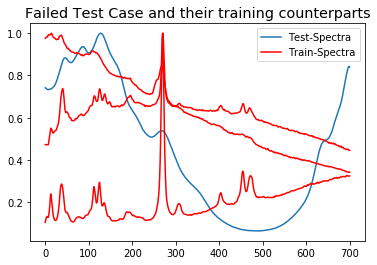

In [44]:
plt.title('Failed Test Case and their training counterparts', fontsize='x-large')
plt.plot(X_test[failed_indices[1]]/max(X_test[failed_indices[1]]))
Spectra_failed_Cases_train=X_train[np.where(Y_train==1)[0]]
for i in range(3):
    plt.plot(Spectra_failed_Cases_train[i]/max(Spectra_failed_Cases_train[i]),'r')
plt.legend(['Test-Spectra','Train-Spectra']) 
plt.savefig('Images/FailedvsTrain2.png')

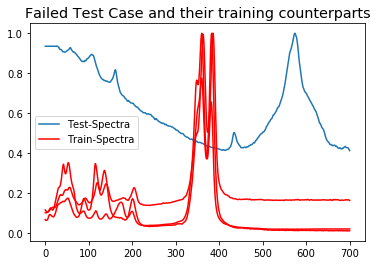

In [49]:
plt.title('Failed Test Case and their training counterparts', fontsize='x-large')
plt.plot(X_test[failed_indices[2]]/max(X_test[failed_indices[2]]))
Spectra_failed_Cases_train=X_train[np.where(Y_train==2)[0]]
for i in range(3):
    plt.plot(Spectra_failed_Cases_train[i]/max(Spectra_failed_Cases_train[i]),'r')
plt.legend(['Test-Spectra','Train-Spectra']) 
plt.savefig('Images/FailedvsTrain3.png')

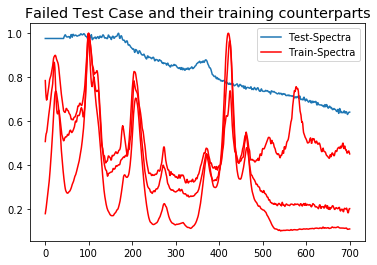

In [50]:
plt.title('Failed Test Case and their training counterparts', fontsize='x-large')
plt.plot(X_test[failed_indices[3]]/max(X_test[failed_indices[3]]))
Spectra_failed_Cases_train=X_train[np.where(Y_train==3)[0]]
for i in range(3):
    plt.plot(Spectra_failed_Cases_train[i]/max(Spectra_failed_Cases_train[i]),'r')
plt.legend(['Test-Spectra','Train-Spectra']) 
plt.savefig('Images/FailedvsTrain4.png')

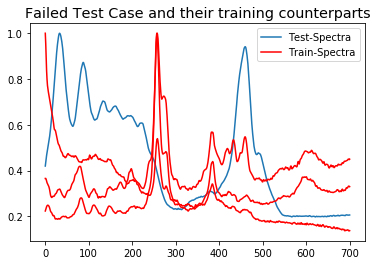

In [51]:
plt.title('Failed Test Case and their training counterparts', fontsize='x-large')
plt.plot(X_test[failed_indices[4]]/max(X_test[failed_indices[4]]))
Spectra_failed_Cases_train=X_train[np.where(Y_train==4)[0]]
for i in range(3):
    plt.plot(Spectra_failed_Cases_train[i]/max(Spectra_failed_Cases_train[i]),'r')
plt.legend(['Test-Spectra','Train-Spectra']) 
plt.savefig('Images/FailedvsTrain5.png')